In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn import metrics

In [3]:
df = pd.read_csv('Social_Network_Ads(1).csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
x = df.iloc[:, [2,3]].values
y = df.iloc[:, -1].values

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [6]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [7]:
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [8]:
y_pred = classifier.predict(x_test)

In [9]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[57  1]
 [ 5 17]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


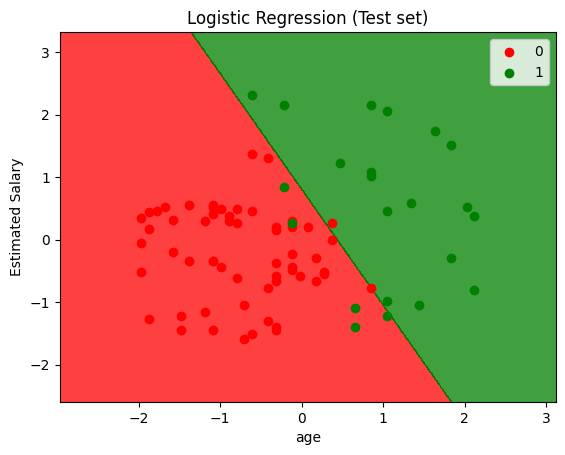

In [10]:
x_set, y_set = x_test, y_test

x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))

plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
    
plt.title('Logistic Regression (Test set)')
plt.xlabel('age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [11]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred)*100)

Accuracy:  92.5


In my Opinion:

The logistic regression model has performed well in predicting the likelihood of buyers for the new mobile phone based on the given independent variables 'Age' and 'Estimated Salary'. The accuracy of 92.5% indicates that the model has made accurate predictions for most of the instances in the test set.

Compare it with the Knn algorithms in lab#3:

Accuracy: The logistic regression model achieved an accuracy of 92.5%, which is slightly lower than the K-NN model's accuracy in Lab#3 (95.0%). Therefore, in terms of accuracy, the K-NN model performed slightly better.
